**Step 1**: Deciding (not) to segment For understanding the need and intrest of the market it is better to segment. This will help us to analyse the market inclination and factors contributing to it. In this case of understanding the market of Electric vehicle in india the segments will be deciding after analysing the data.



In [2]:
#let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)


In [3]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.5 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=97d215a2ac5743884e2a30ddd2c9cd42d1f7c9b8c08849d3f713156c5ad39fcb
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=39180ed67f837cd14410acec9ae0eef98928dce187f92d516bf8bc829cf23d87
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit adjustText


In [4]:
data = pd.read_csv('ElectricCarData.csv')

In [5]:
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [6]:
data.tail()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5 sec,190 km/h,400 km,238 Wh/km,480 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,62000


In [7]:
data.nunique()

Brand           33
Model          102
Accel           55
TopSpeed        25
Range           50
Efficiency      54
FastCharge      51
RapidCharge      2
PowerTrain       3
PlugType         4
BodyStyle        9
Segment          8
Seats            5
PriceEuro       87
dtype: int64

In [8]:
data.describe()


,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [9]:
data.describe(include='all')


,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103,103,103,103,103,103,103,103,103,103,103.000000,103.000000
unique,33,102,55,25,50,54,51,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,9.0 sec,160 km/h,250 km,168 Wh/km,230 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,7,15,6,6,6,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


In [10]:
data.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [11]:
data.isna().sum()
data.isnull().sum()


Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [12]:
data['Brand'].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

In [13]:
data['Model'].value_counts()

e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh                    1
e-tron 50 quattro                1
e-2008 SUV                       1
i3 120 Ah                        1
M-Byte 95 kWh 2WD                1
Name: Model, Length: 102, dtype: int64

In [14]:
data['Accel'].value_counts()

9.0 sec     7
7.3 sec     6
7.5 sec     5
7.9 sec     5
10.0 sec    4
6.8 sec     3
2.8 sec     3
7.0 sec     3
5.7 sec     3
5.1 sec     3
4.0 sec     3
8.5 sec     2
11.4 sec    2
4.6 sec     2
12.3 sec    2
6.0 sec     2
4.5 sec     2
9.9 sec     2
5.0 sec     2
6.3 sec     2
3.5 sec     2
11.9 sec    2
9.5 sec     2
9.7 sec     2
8.1 sec     2
9.8 sec     1
14.0 sec    1
22.4 sec    1
6.9 sec     1
5.5 sec     1
3.4 sec     1
4.8 sec     1
12.7 sec    1
3.2 sec     1
11.6 sec    1
6.6 sec     1
6.2 sec     1
4.7 sec     1
9.6 sec     1
2.5 sec     1
7.6 sec     1
3.7 sec     1
12.6 sec    1
8.7 sec     1
8.3 sec     1
8.8 sec     1
2.1 sec     1
5.6 sec     1
3.8 sec     1
6.5 sec     1
3.0 sec     1
7.8 sec     1
8.2 sec     1
4.9 sec     1
5.9 sec     1
Name: Accel, dtype: int64

In [15]:
data['TopSpeed'].value_counts()

160 km/h    15
150 km/h    15
180 km/h    11
200 km/h     8
250 km/h     7
130 km/h     7
190 km/h     6
167 km/h     4
210 km/h     4
140 km/h     4
135 km/h     3
157 km/h     2
260 km/h     2
155 km/h     2
145 km/h     2
261 km/h     2
410 km/h     1
241 km/h     1
233 km/h     1
240 km/h     1
217 km/h     1
165 km/h     1
144 km/h     1
225 km/h     1
123 km/h     1
Name: TopSpeed, dtype: int64

In [16]:
data['Range'].value_counts()

250 km    6
400 km    6
365 km    5
425 km    4
450 km    4
390 km    3
335 km    3
340 km    3
440 km    3
375 km    3
195 km    3
255 km    3
325 km    3
420 km    3
95 km     2
230 km    2
410 km    2
235 km    2
330 km    2
270 km    2
320 km    2
350 km    2
360 km    2
170 km    2
190 km    2
220 km    2
370 km    2
275 km    2
310 km    2
460 km    1
295 km    1
100 km    1
610 km    1
225 km    1
385 km    1
430 km    1
160 km    1
505 km    1
280 km    1
130 km    1
970 km    1
575 km    1
380 km    1
185 km    1
515 km    1
290 km    1
435 km    1
750 km    1
315 km    1
180 km    1
Name: Range, dtype: int64

In [17]:
data['Efficiency'].value_counts()

168 Wh/km    6
193 Wh/km    5
171 Wh/km    4
166 Wh/km    4
180 Wh/km    4
164 Wh/km    4
167 Wh/km    4
161 Wh/km    3
188 Wh/km    3
175 Wh/km    3
176 Wh/km    3
194 Wh/km    3
206 Wh/km    3
181 Wh/km    3
200 Wh/km    3
197 Wh/km    2
165 Wh/km    2
173 Wh/km    2
183 Wh/km    2
232 Wh/km    2
153 Wh/km    2
156 Wh/km    2
216 Wh/km    2
178 Wh/km    2
215 Wh/km    1
209 Wh/km    1
217 Wh/km    1
244 Wh/km    1
258 Wh/km    1
261 Wh/km    1
273 Wh/km    1
222 Wh/km    1
219 Wh/km    1
270 Wh/km    1
207 Wh/km    1
191 Wh/km    1
170 Wh/km    1
256 Wh/km    1
154 Wh/km    1
198 Wh/km    1
177 Wh/km    1
211 Wh/km    1
237 Wh/km    1
104 Wh/km    1
195 Wh/km    1
228 Wh/km    1
184 Wh/km    1
172 Wh/km    1
267 Wh/km    1
231 Wh/km    1
179 Wh/km    1
223 Wh/km    1
160 Wh/km    1
238 Wh/km    1
Name: Efficiency, dtype: int64

In [18]:
data['FastCharge'].value_counts()

230 km/h    6
440 km/h    5
540 km/h    5
-           5
380 km/h    5
470 km/h    4
560 km/h    4
190 km/h    4
260 km/h    3
170 km/h    3
420 km/h    3
210 km/h    3
490 km/h    2
710 km/h    2
270 km/h    2
450 km/h    2
350 km/h    2
330 km/h    2
590 km/h    2
550 km/h    2
340 km/h    2
480 km/h    2
650 km/h    2
220 km/h    2
620 km/h    2
390 km/h    2
410 km/h    1
770 km/h    1
460 km/h    1
740 km/h    1
360 km/h    1
810 km/h    1
290 km/h    1
430 km/h    1
510 km/h    1
320 km/h    1
890 km/h    1
940 km/h    1
520 km/h    1
900 km/h    1
920 km/h    1
730 km/h    1
610 km/h    1
570 km/h    1
240 km/h    1
250 km/h    1
910 km/h    1
850 km/h    1
930 km/h    1
780 km/h    1
500 km/h    1
Name: FastCharge, dtype: int64

In [19]:
data['RapidCharge'].value_counts()

Rapid charging possible        98
Rapid charging not possible     5
Name: RapidCharge, dtype: int64

In [20]:
data['PowerTrain'].value_counts()

All Wheel Drive      41
Front Wheel Drive    37
Rear Wheel Drive     25
Name: PowerTrain, dtype: int64

In [21]:
data['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [22]:
data['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [23]:
data['Segment'].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

In [24]:
data['Seats'].value_counts()

5    71
4    21
7     6
6     3
2     2
Name: Seats, dtype: int64

In [25]:
data['PriceEuro'].value_counts()

45000    6
50000    3
29234    2
30000    2
36837    2
        ..
38105    1
67358    1
34361    1
38017    1
62000    1
Name: PriceEuro, Length: 87, dtype: int64

In [26]:
data['Brand'].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

In [27]:
# Converting Price from Euro to Rupees for further simplification
data['PriceEuro'] = data['PriceEuro'].apply(lambda x : x * 86)
data.rename(columns={"PriceEuro":"PriceINR"}, inplace = True)


In [28]:
data["Segment"]= data["Segment"].replace({'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'N':7, 'S':8})
data["RapidCharge"]= data["RapidCharge"].replace({'Rapid charging possible':1, 'Rapid charging not possible':0})
data["PowerTrain"]= data["PowerTrain"].replace({'All Wheel Drive':1,'Front Wheel Drive':2, 'Rear Wheel Drive':3})
data["PlugType"]= data["PlugType"].replace({'Type 2 CCS':1,'Type 2':2, 'Type 2 CHAdeMO':3, 'Type 1 CHAdeMO':4})
data["Brand"]= data["Brand"].replace({'Tesla':1,'Audi':2, 'Nissan':3, 'Volkswagen':4, 'Skoda':5, 'Renault':6, 'Porsche':7, 'Kia':8, 'BMW':9, 'Ford':10, 'Smart':11, 'Byton':12, 'Mercedes':13, 'Hyndai':14, 'Opel':15, 'Fiat':16, 'Peugeot':17, 'Honda':18, 'Mini':19, 'DS':20, 'Polestar':21, 'Sono':22, 'Lucid':23, 'Jaguar':24, 'Citroen':25, 'Aiways':26, 'MG':27, 'Lightyear':28, 'SEAT':29, 'CUPRA':30, 'Lexus':31, 'Mazda':32, 'Volvo':33})
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,1,1,1,Sedan,4,5,4771280
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,1,3,1,Hatchback,3,5,2580000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,1,1,1,Liftback,4,5,4853840
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,1,3,1,SUV,4,5,5851440
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,1,3,1,Hatchback,2,4,2837742


In [29]:
data.drop(['Model', 'BodyStyle'], axis=1, inplace=True)
data['FastCharge'] = data['FastCharge'].str[0:4]
data['Efficiency'] = data['Efficiency'].str[0:4]
data['Range'] = data['Range'].str[0:4]
data['TopSpeed'] = data['TopSpeed'].str[0:4]
data['Accel'] = data['Accel'].str[0:4]
data.head()

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR
0,Tesla,4.6,233,450,161,940,1,1,1,4,5,4771280
1,Volkswagen,10.0,160,270,167,250,1,3,1,3,5,2580000
2,Polestar,4.7,210,400,181,620,1,1,1,4,5,4853840
3,BMW,6.8,180,360,206,560,1,3,1,4,5,5851440
4,Honda,9.5,145,170,168,190,1,3,1,2,4,2837742


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Accel        103 non-null    object
 2   TopSpeed     103 non-null    object
 3   Range        103 non-null    object
 4   Efficiency   103 non-null    object
 5   FastCharge   103 non-null    object
 6   RapidCharge  103 non-null    int64 
 7   PowerTrain   103 non-null    int64 
 8   PlugType     103 non-null    int64 
 9   Segment      103 non-null    int64 
 10  Seats        103 non-null    int64 
 11  PriceINR     103 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 9.8+ KB


In [31]:
data.Accel = data.Accel.astype(float)
data.TopSpeed = data.TopSpeed.astype(int)
data['Range'] = data['Range'].replace(['95 k'], ['95'])
data.Range = data.Range.astype(int)
data.Efficiency = data.Efficiency.astype(int)
data['FastCharge'] = data['FastCharge'].replace(['-'], ['0'])
data.FastCharge = data.FastCharge.astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Accel        103 non-null    float64
 2   TopSpeed     103 non-null    int64  
 3   Range        103 non-null    int64  
 4   Efficiency   103 non-null    int64  
 5   FastCharge   103 non-null    int64  
 6   RapidCharge  103 non-null    int64  
 7   PowerTrain   103 non-null    int64  
 8   PlugType     103 non-null    int64  
 9   Segment      103 non-null    int64  
 10  Seats        103 non-null    int64  
 11  PriceINR     103 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 9.8+ KB


In [32]:
data.head()

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR
0,Tesla,4.6,233,450,161,940,1,1,1,4,5,4771280
1,Volkswagen,10.0,160,270,167,250,1,3,1,3,5,2580000
2,Polestar,4.7,210,400,181,620,1,1,1,4,5,4853840
3,BMW,6.8,180,360,206,560,1,3,1,4,5,5851440
4,Honda,9.5,145,170,168,190,1,3,1,2,4,2837742


In [33]:
data1= data.iloc[:,1:12]
data1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR
0,4.6,233,450,161,940,1,1,1,4,5,4771280
1,10.0,160,270,167,250,1,3,1,3,5,2580000
2,4.7,210,400,181,620,1,1,1,4,5,4853840
3,6.8,180,360,206,560,1,3,1,4,5,5851440
4,9.5,145,170,168,190,1,3,1,2,4,2837742


In [34]:
scaled_df = scalar.fit_transform(data1)
pca = PCA(n_components = 11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,2.252066,-1.006737,0.499618,1.204609,-0.362687,0.477133,-1.167548,-0.699600,-0.843582,-0.360242,0.118596
1,-1.891632,-0.627662,-0.465939,0.187507,0.906887,0.155789,0.407922,-0.138186,0.467333,-0.346712,-0.029560
2,1.518901,-0.515081,0.138373,0.351200,-0.674454,0.165786,-0.607368,-0.141140,-0.183670,-0.241269,-0.255355
3,0.362137,-0.313539,-0.056187,-0.314263,1.544371,-0.514049,0.149709,-0.294583,0.072589,0.343365,0.214944
4,-2.711001,-0.916367,0.431418,-0.233368,0.314621,-0.556174,0.776515,-0.288999,0.285473,-0.186864,-0.034757


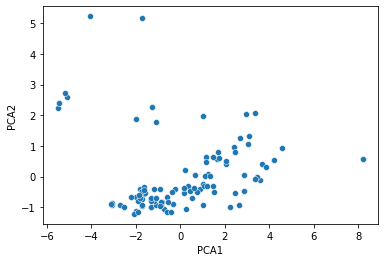

In [35]:
#Visualization of PCA1 and PCA2
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")


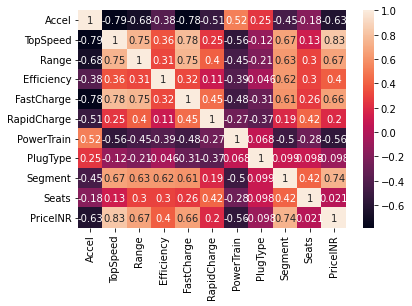

In [36]:
sns.heatmap(data1.corr(), annot=True)

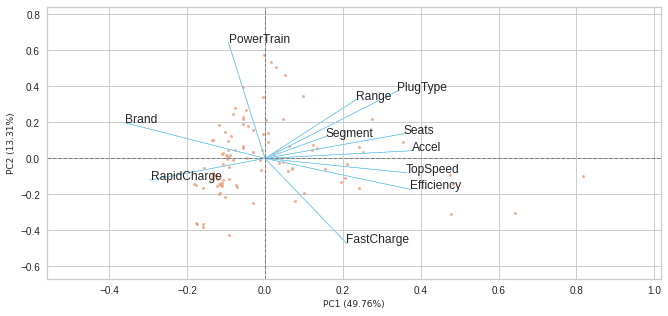

In [52]:
from bioinfokit.visuz import cluster

pca_scores = PCA().fit_transform(data1)
loadings = pca.components_

cluster.biplot(cscore= pca_scores, loadings=loadings, labels=data.columns.values, 
            var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(11,5))

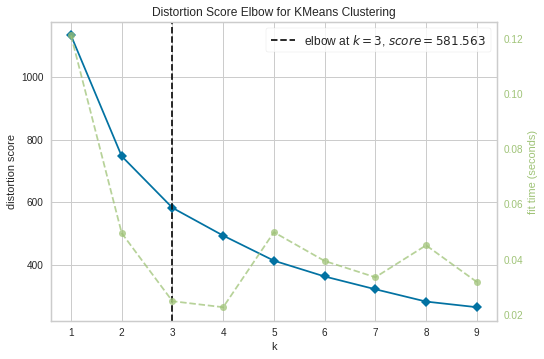

In [38]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()     

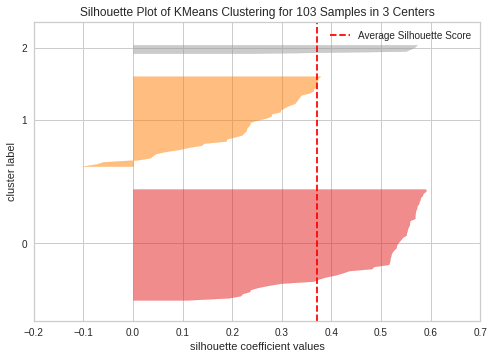

In [39]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure


In [40]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,2.252066,-1.006737,0.499618,1.204609,-0.362687,0.477133,-1.167548,-0.699600,-0.843582,-0.360242,0.118596,0
1,-1.891632,-0.627662,-0.465939,0.187507,0.906887,0.155789,0.407922,-0.138186,0.467333,-0.346712,-0.029560,1
2,1.518901,-0.515081,0.138373,0.351200,-0.674454,0.165786,-0.607368,-0.141140,-0.183670,-0.241269,-0.255355,0
3,0.362137,-0.313539,-0.056187,-0.314263,1.544371,-0.514049,0.149709,-0.294583,0.072589,0.343365,0.214944,1
4,-2.711001,-0.916367,0.431418,-0.233368,0.314621,-0.556174,0.776515,-0.288999,0.285473,-0.186864,-0.034757,1


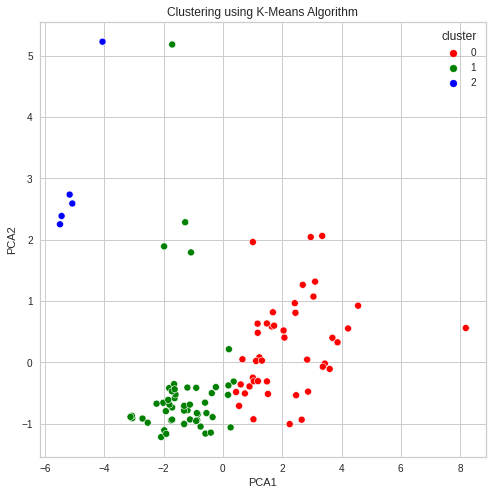

In [41]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [42]:
# Creating a target column "Cluster" for storing the cluster segment
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()


,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR,cluster
0,4.6,233,450,161,940,1,1,1,4,5,4771280,0
1,10.0,160,270,167,250,1,3,1,3,5,2580000,2
2,4.7,210,400,181,620,1,1,1,4,5,4853840,0
3,6.8,180,360,206,560,1,3,1,4,5,5851440,2
4,9.5,145,170,168,190,1,3,1,2,4,2837742,2


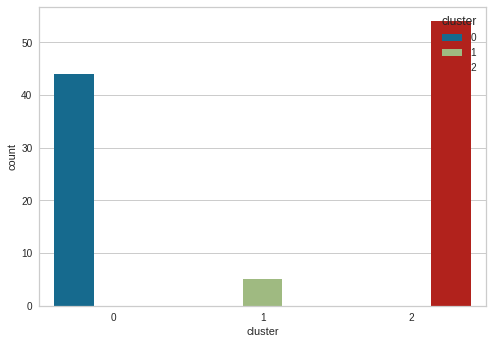

In [43]:
#analysis cluster's
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")


In [44]:
#grouping with cluster 1
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()


,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR,cluster
0,4.6,233,450,161,940,1,1,1,4,5,4771280,0
2,4.7,210,400,181,620,1,1,1,4,5,4853840,0
5,2.8,250,610,180,620,1,1,1,6,5,9030000,0
9,6.3,180,400,193,540,1,1,1,4,5,4730000,0
10,5.1,180,370,216,440,1,1,1,4,5,5975624,0


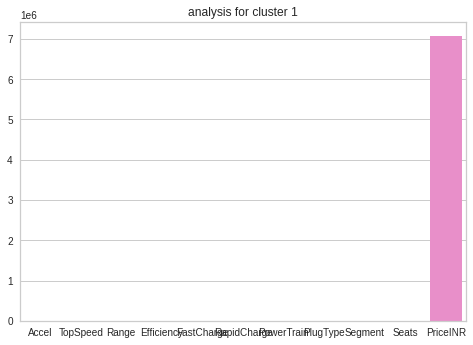

In [45]:
#analysis for cluster 1
ax = sns.barplot(data=cluster_1_df[['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'Segment', 'Seats', 'PriceINR']], ci=None)
plt.title('Analysis of cluster 1')
plt.show()


In [46]:
#grouping with cluster 2

cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR,cluster
57,12.6,135,130,164,0,0,3,2,1,4,2131940,1
68,22.4,130,160,194,0,0,2,2,7,5,3268000,1
77,12.7,130,95,176,0,0,3,2,1,4,1894580,1
82,11.6,130,100,167,0,0,3,2,1,2,1839282,1
91,11.9,130,95,176,0,0,3,2,1,2,2112590,1


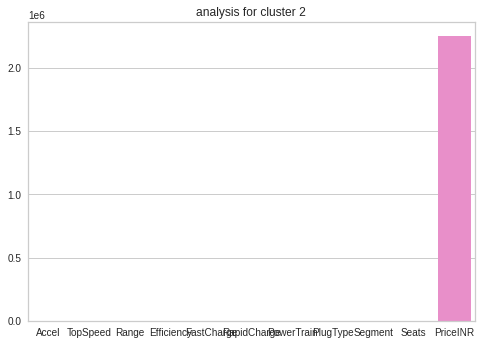

In [47]:
#analysis for cluster 2

ax = sns.barplot(data=cluster_2_df[['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'Segment', 'Seats', 'PriceINR']], ci=None)
plt.title('Analysis of cluster 2')
plt.show()


In [48]:
#grouping with cluster 3

cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR,cluster
1,10.0,160,270,167,250,1,3,1,3,5,2580000,2
3,6.8,180,360,206,560,1,3,1,4,5,5851440,2
4,9.5,145,170,168,190,1,3,1,2,4,2837742,2
6,9.6,150,190,168,220,1,2,1,3,5,2743400,2
7,8.1,150,275,164,420,1,2,1,2,5,2552652,2


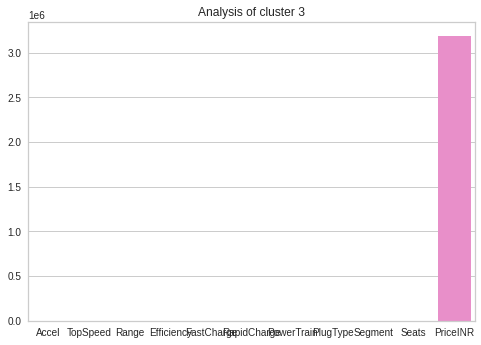

In [49]:
#analysis for cluster 3

ax = sns.barplot(data=cluster_3_df[['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'Segment', 'Seats', 'PriceINR']], ci=None)
plt.title('Analysis of cluster 3')
plt.show()

In [50]:
data.head()

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR
0,Tesla,4.6,233,450,161,940,1,1,1,4,5,4771280
1,Volkswagen,10.0,160,270,167,250,1,3,1,3,5,2580000
2,Polestar,4.7,210,400,181,620,1,1,1,4,5,4853840
3,BMW,6.8,180,360,206,560,1,3,1,4,5,5851440
4,Honda,9.5,145,170,168,190,1,3,1,2,4,2837742


In [51]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
data_new.head()


,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,Segment,Seats,PriceINR,cluster
0,Tesla,4.6,233,450,161,940,1,1,1,4,5,4771280,0
1,Volkswagen,10.0,160,270,167,250,1,3,1,3,5,2580000,2
2,Polestar,4.7,210,400,181,620,1,1,1,4,5,4853840,0
3,BMW,6.8,180,360,206,560,1,3,1,4,5,5851440,2
4,Honda,9.5,145,170,168,190,1,3,1,2,4,2837742,2
